# TP Méthodes de gradient

# Étape 1 :

**I. Méthode de Gradient à pas constant (GF)**


Les trois versions de l'algorithme du gradient sont:

-GF (gradient à pas fixe): cet algorithme utilise un pas fixe prédéfini pour  chaque itération du gradient.

Soit $x^{(0)} ∈ R^N$, $\rho>0$ constant , nous avons :

$x^{(k+1)} = x^k - \rho \nabla(J(u^k))$



GV (gradient à pas variable): cet algorithme ajuste le pas à chaque itération en utilisant une formule qui dépend de la valeur actuelle
et précédente de la fonction objectif.

Soit $x^{(0)} ∈ R^N$, $\rho>0$ constant , nous avons :

$x^{(k+1)} = x^k - \rho(u^k) \nabla(J(u^k))$

GO (gradient à pas optimal): cet algorithme calcule le pas optimal à chaque itération en résolvant un problème de minimisation unidimensionnel pour
chaque direction de recherche. 

Soit $x^{(0)} ∈ R^N$, $k = 0, 1, 2, ..., k_{max}$ et $\rho>0$

$min(J(u^{k} - \rho \nabla J(u^{k}))$ 

où $\rho = \rho_{opt} > 0$

$u^{(k+1)} = u^k - \rho_{opt} \nabla(J(u^k))$








Les données utilisateur requises sont le point initial u0, le pas fixe α, le nombre maximal d'itérations K, et le seuil d'arrêt ε.

* Données utilisateur :

$u(0)$ : le point initial 

$J(u)$ : la fonction à minimiser

$\epsilon_u$ : la précision souhaitée pour la norme de la différence entre deux itérations successives de la solution

$\epsilon_g$ : la précision souhaitée pour la norme du gradient de la fonction $J$

* Données numériques :

$N$ : la dimension de l'espace de départ $R^N$

$x^{(0)}$ : la solution initiale

* Données de contrôle :

$\rho$ : la taille du pas de la descente de gradient

$K$ : le nombre maximal d'itérations 

$ε$ : le seuil d'arrêt ε



# Étape 2 : 

## Fonctions cout:

In [ ]:
import numpy as np

def J1(v):
  n = v.shape[0]
  som=0
  for i in range(n):
      som+=(v[i]-1)**2
  return som
    
def J2(v):
  n = v.shape[0]
  som=0
  for i in range(n):
      som+=(v[i]-(i+1))**2
  return som


def JR(v):
  n = v.shape[0]-1
  som=0
  for i in range(n):
      som+=(v[i]-1)**2+(v[i+1]-v[i]**2)**2
  return som

## Fonctions Gradient :

In [ ]:
    
def gradient_J1(v):
  n = v.shape[0]
  grad = np.zeros(v.shape)
  for i in range(n):
      grad[i] = 2 * (v[i] - 1)
  return grad



def gradient_J2 (v):
  n = v.shape[0]
  grad = np.zeros(v.shape)
  for i in range(n):
      grad[i] = 2 * (v[i] - (i+1))
  return grad
    
  

def gradient_JR(v):
  n=v.shape[0]-1
  u=np.copy(v)
  u[n]=2*(v[n]-v[n-1]**2)
  for i in range (n):
          u[i]=4*v[i]*(v[i]**2-v[i+1])+2*(v[i]-1)+2*(v[i]-v[i-1]**2)
  return u


## Algo GF :


In [ ]:
def GF(u0,fonction,gradient,epsilon,nb_iteration,t):
    L = [fonction(u0)]
    u1 = np.copy(u0)
    u0=np.zeros(u1.shape)
    k = 0
    L.append(fonction(u1))
    while (k<=nb_iteration) and (abs(fonction(u1)-fonction(u0))>epsilon) :
        u0=u1
        u1=np.copy(u0-t*gradient(u0))       
        k+=1
        L.append(fonction(u1))
    return u1,k,L

# Etape 3:

## Test avec J1 et J2

In [ ]:
N = [10,20,40]


t = 1
v0 = np.random.randint(10,size = 10)#On choisit un vecteur aléatoire 
print('v0 = : ',v0,'\n')
print('algo GF : \n')
print('Cas de J1 : \n')
print('t = 1 : \n')

for n in N:
  u,k,L = GF(v0,J1,gradient_J1,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

t = 0.5
print('\nt = 0.5 :\n')
for n in N:
  u,k,L = GF(v0,J1,gradient_J1,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')


print('Cas de J2 : \n')
print('t = 1 : \n')
t = 1
for n in N:
  u,k,L = GF(v0,J2,gradient_J2,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

t = 0.5
print('\nt = 0.5 :\n')
for n in N:
  u,k,L = GF(v0,J2,gradient_J2,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

v0 = :  [7 2 7 4 9 3 9 6 7 0] 

algo GF : 

Cas de J1 : 

t = 1 : 

N =  10 :  vecteur final :  [-5.  0. -5. -2. -7. -1. -7. -4. -5.  2.] , nombre d'iteration :  1 

N =  20 :  vecteur final :  [-5.  0. -5. -2. -7. -1. -7. -4. -5.  2.] , nombre d'iteration :  1 

N =  40 :  vecteur final :  [-5.  0. -5. -2. -7. -1. -7. -4. -5.  2.] , nombre d'iteration :  1 


t = 0.5 :

N =  10 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

N =  20 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

N =  40 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

Cas de J2 : 

t = 1 : 

N =  10 :  vecteur final :  [-5.  2. -1.  4.  1.  9.  5. 10. 11. 20.] , nombre d'iteration :  1 

N =  20 :  vecteur final :  [-5.  2. -1.  4.  1.  9.  5. 10. 11. 20.] , nombre d'iteration :  1 

N =  40 :  vecteur final :  [-5.  2. -1.  4.  1.  9.  5. 10. 11. 20.] , nombre d'iteration :  1 


t = 0.5 :

N =  10 :  vecteur final :  [ 1.

Lors de l'utilisation de l'algorithme GF (Gradient Forward), la taille du pas t joue un rôle important dans la convergence de l'algorithme. Si le pas est trop grand, la méthode risque de ne pas converger. En revanche, si le pas est trop petit, l'algorithme peut converger très lentement.
Lorsque le pas t est grand, les mises à jour de v sont également grandes, ce qui peut causer des oscillations et faire que la méthode diverge. En effet, si le pas est trop grand, l'algorithme peut passer le minimum de la fonction et ne plus jamais y revenir.
En revanche, lorsque le pas t est petit, les mises à jour de v sont également petites, ce qui permet de se rapprocher progressivement du minimum de la fonction. Cependant, cela peut entraîner une convergence très lente, car il peut falloir beaucoup d'itérations pour atteindre le minimum.
Il est donc important de choisir une valeur appropriée pour le pas t en fonction de la fonction à optimiser et de la précision souhaitée. Une bonne pratique consiste à tester différentes valeurs de t pour trouver celle qui convient le mieux.


Dans notre cas , lorsque le pas t=1 il est trop grand pour converger vers le minimum et on passe ce minimum . Néanmoins si on change ce pas t en t=1/2 on peut voire que la méthode va dorénavant converger puisque avec ce pas dorénavant plus petit on converge vers la bonne solution.

On sais que doit respecter ces inégalités $0< t< \frac{2\alpha}{M^2} = 1$ pour pouvoir converger.
 
Lorsque l'on prends $t = 0.5$, la condition $0< t< \frac{2\alpha}{M^2} = 1$ est bien respectée et on retrouve bien la solution optimale pour $J_{1}$ et $J_{2}$ ce n'est pas le cas pour $t = 1$


# Etape 4:




Pour construire l'approximation parabolique de la fonction f(t) = J(uk - t∇J(uk)) sous forme comme on l'a vu en cours f(t)=a*t^2+b*t+c , nous allons utiliser les valeurs f(0), f'(0) et f(tk-1). Pour cela, nous allons effectuer les étapes suivantes :

-Calculer la valeur de J(uk)

-Calculer la valeur de J(uk - t∇J(uk))

-Calculer la valeur de ∇J(uk)

-Calculer la valeur de f'(0) = ∇J(uk) * (-∇J(uk))

-Calculer la valeur de f(tk-1) = J(uk - tk-1 * ∇J(uk))

-Utiliser les valeurs de f(0), f'(0) et f(tk-1) pour construire l'approximation parabolique de la fonction f(t)

-Trouver la valeur de t qui minimise l'approximation parabolique de f(t) pour obtenir le pas optimal tk


L'approximation parabolique de la fonction f(t) = J(uk −t∇J(uk)) est donnée  en utilisant l'accroissement par :

f(t) ≈ J(uk) - t∇J(uk)ᵀ∇J(uk) + 0.5t²∇J(uk)ᵀHJ(uk)∇J(uk)

où HJ(uk) est la matrice hessienne de J en uk.


## Algo GO

In [ ]:
#Nous avons créer une fonction pas optimal 
def pas_optimal(uk,fonction,gradient,epsilon,nb_iteration,t0):
    c = fonction(uk)
    b = -np.dot(gradient(uk).T,gradient(uk))
    f_t=fonction(uk-t0*gradient(uk))
    a=(f_t-b*t0-c)/((t0)**2)
    t_k=-b/(2*a)
    f_t_k=fonction(uk-t_k*gradient(uk))
    k=1
    while (k<=nb_iteration) and (abs(f_t_k-f_t)>epsilon):
        f_t=f_t_k
        a=(f_t-b*t0-c)/((t0)**2)
        t_k = -b/(2*a)
        f_t_k = fonction(uk-t_k*gradient(uk))
        k += 1
    return t_k

def GO(u0,fonction,gradient,epsilon,nb_iteration,t):
    L = [fonction(u0)]
    new_t=pas_optimal(u0,fonction,gradient,epsilon,nb_iteration,t)
    u1=np.copy(u0-new_t*gradient(u0))
    L.append(fonction(u1))
    k = 0
    while (k<=nb_iteration) and (abs(fonction(u1)-fonction(u0))>epsilon):
        u0=u1
        new_t=pas_optimal(u0,fonction,gradient,epsilon,nb_iteration,new_t)
        u1=np.copy(u0-new_t*gradient(u0))
        k+=1
        L.append(fonction(u1))
    return u1,k,L



## Test avec J1 et J2

In [ ]:
print('algo GO : \n')
v0 = np.random.randint(10,size = 10)
print('v0 = : ',v0,'\n')

print('Cas de J1 :\n')
u,k,L = GO(v0,J1,gradient_J1,1e-5,20,1)

print('vecteur finale : ',u,', nombre d\'iteration : ',k,'\n')

print('\nCas de J2 :\n')
u,k,L = GO(v0,J2,gradient_J2,1e-5,20,1)
print('vecteur finale : ',u,', nombre d\'iteration : ',k,'\n')


algo GO : 

v0 = :  [5 6 3 8 9 1 2 3 0 8] 

Cas de J1 :

vecteur finale :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  3 


Cas de J2 :

vecteur finale :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] , nombre d'iteration :  3 



## Comparaison algo GO et GF avec JR

Cas de JR

v0 = :  [1 9 7 8 1 2 9 1 1 8] 

Algo GF : 

t = 0.000001 :

N =  10 :  vecteur final :  [2.40942731 3.25124764 3.33522181 3.14217837 1.47799824 2.00689407
 3.01630086 1.44868006 1.34217399 7.85482857] , nombre d'iteration :  11 

N =  20 :  vecteur final :  [3.02480859 2.64079196 2.66362614 2.50192531 1.5721616  1.90411303
 2.38011113 1.51230764 1.67751147 7.74354984] , nombre d'iteration :  21 

N =  40 :  vecteur final :  [3.22060863 2.22518664 2.10618547 1.9866962  1.59085363 1.72675642
 1.88627173 1.55840611 2.23944839 7.59244916] , nombre d'iteration :  41 


algo GO : 

vecteur final :  [ 2.49254477 -0.32655026  2.30178719  1.35846798  1.43746026  1.67762309
 -0.99712634  1.46440522  1.46425298  7.80879577] , nombre d'iteration :  21 



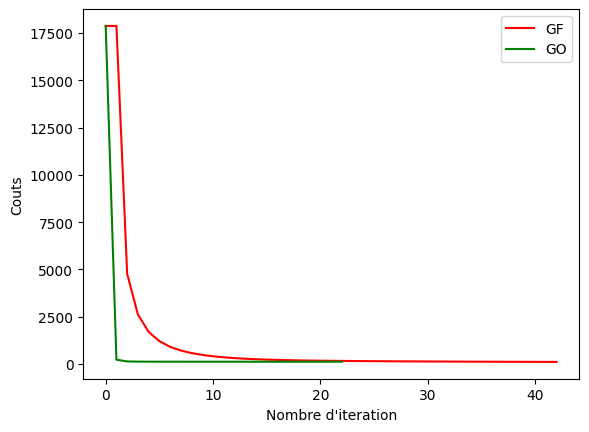

In [ ]:
import matplotlib.pyplot as plt

print('Cas de JR\n')
v0 = np.random.randint(10,size = 10)
print('v0 = : ',v0,'\n')

print('Algo GF : \n')
t = 0.001
print('t = 0.000001 :\n')
for n in N:
  u,k,L_GF = GF(v0,JR,gradient_JR,1e-10,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')



print('\nalgo GO : \n')
u,k,L_GO = GO(v0,JR,gradient_JR,1e-10,20,t)
print('vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

plt.plot(L_GF,color = 'red',label = 'GF')
plt.plot(L_GO,color = 'green',label = 'GO')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')


plt.show()


# Étape 5

## Fonction cout et gradient

In [ ]:
# Fonction cout

def JH(u):
  return (u[0]**2 + u[1] - 2)**2 + (u[1]**2 -2*u[0] + 1)**2

# Fonction gradient

def gradient_JH(u):
  return np.array([4*u[0]*(u[0]**2 + u[1] - 2) - 4*(u[1]**2 - 2*u[0] + 1),2*(u[0]**2 + u[1] - 2) + 4*u[1]*(u[1]**2 - 2*u[0] + 1)])

## Test

### u = (0,0)

In [ ]:
print('Cas de JH\n')
v0 = np.array([0,0])
print('v0 = : ',v0,'\n')
print('Algo GF : \n')

t = 0.5

print('t = 0.5 :\n')
for n in N:
  u,k,L_GF = GF(v0,JR,gradient_JR,1e-20,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

print('\nalgo GO : \n')
u,k,L_GO = GO(v0,JR,gradient_JR,1e-5,20,t)
print('vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

Cas de JH

v0 = :  [0 0] 

Algo GF : 

t = 0.5 :

N =  10 :  vecteur final :  [0 0] , nombre d'iteration :  0 

N =  20 :  vecteur final :  [0 0] , nombre d'iteration :  0 

N =  40 :  vecteur final :  [0 0] , nombre d'iteration :  0 


algo GO : 

vecteur final :  [0.46849564 0.1708224 ] , nombre d'iteration :  8 



### u = (1.5,-1.5)

In [ ]:
print('Cas de JH\n')
v0 = np.array([1.5,-1.5])
print('v0 = : ',v0,'\n')
print('Algo GF : \n')
t = 0.5
print('t = 0.5 :\n')
for n in N:
  u,k,L_GF = GF(v0,JR,gradient_JR,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

print('\nalgo GO : \n')
u,k,L_GO = GO(v0,JR,gradient_JR,1e-5,20,t)
print('vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

Cas de JH

v0 = :  [ 1.5 -1.5] 

Algo GF : 

t = 0.5 :

N =  10 :  vecteur final :  [2.81105603e+273 1.25475713e+182] , nombre d'iteration :  6 

N =  20 :  vecteur final :  [2.81105603e+273 1.25475713e+182] , nombre d'iteration :  6 

N =  40 :  vecteur final :  [2.81105603e+273 1.25475713e+182] , nombre d'iteration :  6 


algo GO : 

vecteur final :  [0.85805807 1.74932753] , nombre d'iteration :  21 



<ipython-input-1-b22583faefb9>:22: RuntimeWarning: overflow encountered in double_scalars
  som+=(v[i]-1)**2+(v[i+1]-v[i]**2)**2
<ipython-input-3-b4104761f473>:7: RuntimeWarning: invalid value encountered in double_scalars
  while (k<=nb_iteration) and (abs(fonction(u1)-fonction(u0))>epsilon) :


On vois de maniere assez evidente que l'algortihme à pas optimal est plus precis pour un meme pas et semble etre de meilleurs qualite pour les approximations, pour valider ce constat nous pourrions reiterer l'experience plusieurs fois .  

#TP2


## Étape 1 :

L'algorithme du gradient conjugué est un algorithme itératif utilisé pour résoudre des systèmes d'équations linéaires de grande taille. Il est souvent utilisé pour résoudre des problèmes de minimisation de fonctions quadratiques et est particulièrement efficace lorsque la matrice associée au système est symétrique et définie positive.
Il y'a une disjonction des cas à faire , en fonction de si la fonction à minimiser est ou non quadratique :

**Quadratique :**

$u^{(0)} ∈ R^N$

$d^{(0)}=\nabla J(u^{(0)})∈ R^N$

Pour $k$  de $0$ à $n$ :         
* $\rho_{k} = \frac{<\nabla J(u^{(k)}), d^{(k)}>}{<Ad^{(k)}, d^{(k)}>}$
* $u^{(k+1)} = u^{(k)} - \rho d^{(k)}$
* $\beta_{k} = -\frac{<\nabla J(u^{(k+1)}), Ad^{(k)}>}{<Ad^{(k)}, d^{(k)}>}$
* $d^{(k+1)}=\nabla J(u^{(k+1)}) + \beta_{k}d^{(k)}$

**Non-Quadratique :**

$u_{0} ∈ R$

$d_{0}=\nabla J(u_{0})$

While $||d_{k}|| > \epsilon_{d_{0}}$ :         
* $\rho_{k}$ par recherche linéaire
* $u_{k+1} = u_{k} - \rho_{k} d_{k}$
* $\beta_{k} =$ regarder les différentes valeurs
* $d_{k+1}=\nabla J(u_{k+1}) + \beta_{k}d_{k}$

##ALGO GC

In [ ]:
# Les matrices A de J1 et J2 sont les même = 2*Id
n = 10 #Taille du vecteur
A12 = 2*np.eye(n)

def pas_optimal_2(gradient,A,d,u):
  return np.dot(gradient(u),d)/np.dot(np.dot(A,d),d)

In [ ]:
def GC(u0,fonction,gradient,epsilon,nb_iteration,t0,A):
    L = [fonction(u0)]
    k=1
    d0=gradient(u0)
    t0=pas_optimal_2(gradient,A,d0,u0)
    u1=np.copy(u0-t0*d0)
    L.append(fonction(u1))
    while (k<nb_iteration-1) and (abs(fonction(u1)-fonction(u0))>epsilon):
        k+=1
        u0=u1
        t0=pas_optimal_2(gradient,A,d0,u0)
        u1=np.copy(u0-t0*d0)
        bheta= - np.dot(gradient(u1),np.dot(A,d0))/(np.dot(np.dot(A,d0),d0))
        d0=gradient(u1)+bheta*d0
        L.append(fonction(u1))
    return u1,k,L



## Test avec J1 et J2

In [ ]:
N = [10,20,40]
t = 1
v0 = np.random.randint(10,size = 10)
print('v0 = : ',v0,'\n')
print('algo GC : \n')
print('Cas de J1 : \n')
print('t = 1 : \n')

for n in N:
  u,k,L = GC(v0,J1,gradient_J1,1e-5,n,t,A12)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

t = 0.8
print('\nt = 0.8 :\n')
for n in N:
  u,k,L = GC(v0,J1,gradient_J1,1e-5,n,t,A12)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')


print('Cas de J2 : \n')
print('t = 1 : \n')
t = 1
for n in N:
  u,k,L = GC(v0,J2,gradient_J2,1e-5,n,t,A12)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

t = 0.8
print('\nt = 0.8 :\n')
for n in N:
  u,k,L = GC(v0,J2,gradient_J2,1e-5,n,t,A12)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')



v0 = :  [3 7 9 8 3 6 1 7 9 5] 

algo GC : 

Cas de J1 : 

t = 1 : 

N =  10 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

N =  20 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

N =  40 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 


t = 0.8 :

N =  10 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

N =  20 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

N =  40 :  vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  2 

Cas de J2 : 

t = 1 : 

N =  10 :  vecteur final :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] , nombre d'iteration :  2 

N =  20 :  vecteur final :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] , nombre d'iteration :  2 

N =  40 :  vecteur final :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] , nombre d'iteration :  2 


t = 0.8 :

N =  10 :  vecteur final :  [ 1.  2.  3.  4.  5.  6.  7.  8.  

##Etape 2 



Soit les fonctions J_3 et J_4 :
$$J_3(v) = \frac{1}{2}(Av, v) - (f, v)$$
$$J_4(v) = \frac{1}{2}(Bv, v) - (f, v)
$$

ou  les matrices A et B sont des matrices bande données par :
A = tridiag[−1, 2, −1] et B = pentadiag[−1, −1, 4, −1, −1] et f = (1, . . . , 1)


In [ ]:
def tridiag(a,b,c,n):
    return np.diag(a*np.ones(n-1),k=-1)+np.diag(b*np.ones(n))+np.diag(c*np.ones(n-1),k=1)


def pentadiag(a,b,c,d,e,n):
    return np.diag(a*np.ones(n-2),k=-2)+np.diag(b*np.ones(n-1),k=-1)+np.diag(c*np.ones(n))+np.diag(d*np.ones(n-1),k=1)+np.diag(e*np.ones(n-2),k=2)


A = tridiag(-1,2,-1,10)
B = pentadiag(-1,-1,4,-1,-1,10)

In [ ]:
def J3(v):
    A=tridiag(-1,2,-1,len(v))
    f=np.ones(len(v))
    return 1/2*np.dot(np.dot(A,v).T,v)-np.dot(f.T,v)

def J4(v):
    B=pentadiag(-1,-1,4,-1,-1,len(v))
    f=np.ones(len(v))
    return 1/2*np.dot(np.dot(B,v).T,v)-np.dot(f.T,v)

def gradient_J3(v):
    A=tridiag(-1,2,-1,len(v))
    f=np.ones(len(v))
    return np.dot(A,v)-f

def gradient_J4(v):
    B=pentadiag(-1,-1,4,-1,-1,len(v))
    f=np.ones(len(v))
    return np.dot(B,v)-f

v0 = :  [5 4 8 1 7 0 6 6 8 8] 

algo GC : 

Cas de J3 : 

t = 1 : 

N =  20 :  vecteur final :  [3.63270308 5.6407563  5.26540616 4.82843137 3.71848739 3.82843137
 4.63270308 6.82037815 7.72654062 6.08578431] , nombre d'iteration :  2 

N =  40 :  vecteur final :  [3.63270308 5.6407563  5.26540616 4.82843137 3.71848739 3.82843137
 4.63270308 6.82037815 7.72654062 6.08578431] , nombre d'iteration :  2 

N =  80 :  vecteur final :  [3.63270308 5.6407563  5.26540616 4.82843137 3.71848739 3.82843137
 4.63270308 6.82037815 7.72654062 6.08578431] , nombre d'iteration :  2 

N =  100 :  vecteur final :  [3.63270308 5.6407563  5.26540616 4.82843137 3.71848739 3.82843137
 4.63270308 6.82037815 7.72654062 6.08578431] , nombre d'iteration :  2 

N =  200 :  vecteur final :  [3.63270308 5.6407563  5.26540616 4.82843137 3.71848739 3.82843137
 4.63270308 6.82037815 7.72654062 6.08578431] , nombre d'iteration :  2 

[87.0, -19.78588935574229, -19.78588935574229]
Cas de J3 : 

t = 0.5 : 

N =  20 :  v

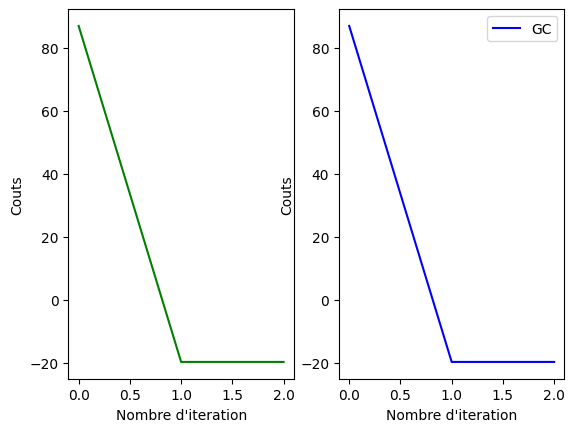

In [ ]:
N = [20,40,80,100,200]
t = 1

v0 = np.random.randint(10,size = 10)

print('v0 = : ',v0,'\n')
print('algo GC : \n')
print('Cas de J3 : \n')
print('t = 1 : \n')

for n in N:
  u,k,L_GC = GC(v0,J3,gradient_J3,1e-5,n,t,A)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GC1 = L_GC
print(L_GC1)

t=0.5

print('Cas de J3 : \n')
print('t = 0.5 : \n')

for n in N:
  u,k,L_GC = GC(v0,J3,gradient_J3,1e-5,n,t,A)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GC2 = L_GC
print(L_GC)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(L_GC1,color = 'green',label = 'GC1')
ax2.plot(L_GC2,color = 'blue',label = 'GC')
ax1.set_xlabel('Nombre d\'iteration')
ax1.set_ylabel('Couts')
ax2.set_xlabel('Nombre d\'iteration')
ax2.set_ylabel('Couts')
plt.legend(loc='best')
plt.show()


v0 = :  [6 5 5 9 6 9 3 3 7 4] 

algo GC : 

Cas de J4 : 

t = 1 : 

N =  20 :  vecteur final :  [ 1.55339712  0.52008372 -2.376318    6.41208092  2.07571726  7.13176872
  0.87092956  0.39088601  2.66755156  2.29104566] , nombre d'iteration :  19 

N =  40 :  vecteur final :  [1.66949799 2.57469133 2.57610591 3.05919561 2.82398883 3.23226721
 3.05556425 2.94875989 1.98967973 1.52699978] , nombre d'iteration :  39 

N =  80 :  vecteur final :  [ 1915.60943252  1061.21869052   109.53315029  -869.13545052
 -1389.43253283    82.79867046   206.72548735  1081.32396586
   193.7564535   -135.24522058] , nombre d'iteration :  79 

N =  100 :  vecteur final :  [  22276.4168762   133623.446085    437279.48169948   52054.21477881
 -104622.54221615 -592807.18958335 -301925.06498061   90657.70699616
  584466.2900436   681236.38204817] , nombre d'iteration :  99 

N =  200 :  vecteur final :  [-3.31875906e+18 -5.40943882e+18 -6.48378927e+18 -8.63980992e+18
 -9.45484884e+18 -9.36198930e+18 -8.44636464e

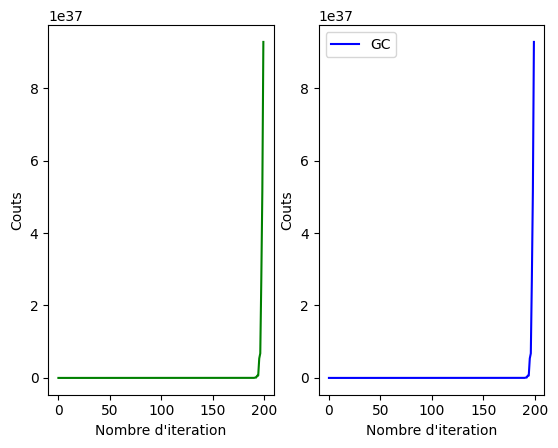

In [ ]:
N = [20,40,80,100,200]
t = 1

v0 = np.random.randint(10,size = 10)

print('v0 = : ',v0,'\n')
print('algo GC : \n')
print('Cas de J4 : \n')
print('t = 1 : \n')

for n in N:
  u,k,L_GC = GC(v0,J4,gradient_J4,1e-5,n,t,A)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GC11 = L_GC


t=0.5

print('Cas de J4 : \n')
print('t = 0.5 : \n')

for n in N:
  u,k,L_GC = GC(v0,J4,gradient_J4,1e-5,n,t,A)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GC22 = L_GC
print(L_GC22)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(L_GC11,color = 'green',label = 'GC1')
ax2.plot(L_GC22,color = 'blue',label = 'GC')
ax1.set_xlabel('Nombre d\'iteration')
ax1.set_ylabel('Couts')
ax2.set_xlabel('Nombre d\'iteration')
ax2.set_ylabel('Couts')
plt.legend(loc='best')
plt.show()


v0 = :  [2 9 1 2 3 5 3 5 6 1] 

algo GF : 

Cas de J3 : 

t = 1 : 

N =  20 :  vecteur final :  [ 2.41031844e+09 -4.43608054e+09  5.78829982e+09 -6.33771653e+09
  6.12868978e+09 -5.34284306e+09  4.22913383e+09 -3.02544626e+09
  1.89585951e+09 -8.99991736e+08] , nombre d'iteration :  21 

N =  40 :  vecteur final :  [ 3.58522879e+18 -6.81338559e+18  9.37754847e+18 -1.10602455e+19
  1.17541224e+19 -1.14613652e+19  1.02749220e+19 -8.34899330e+18
  5.86815763e+18 -3.02343137e+18] , nombre d'iteration :  41 

N =  80 :  vecteur final :  [ 1.34765396e+37 -2.58520860e+37  3.61177643e+37 -4.34405451e+37
  4.72311652e+37 -4.71906010e+37  4.33317314e+37 -3.59752486e+37
  2.57211161e+37 -1.33986975e+37] , nombre d'iteration :  81 

N =  100 :  vecteur final :  [ 2.71140571e+46 -5.20280685e+46  7.27213108e+46 -8.75168325e+46
  9.52174717e+46 -9.52023722e+46  8.74763282e+46 -7.26682614e+46
  5.19793168e+46 -2.70850815e+46] , nombre d'iteration :  101 

N =  200 :  vecteur final :  [ 9.03988398e+92 

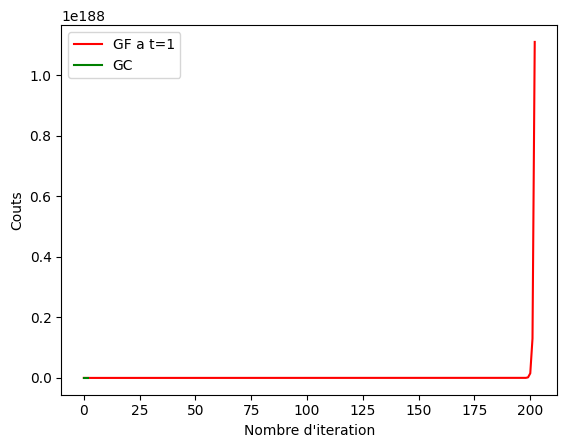

In [ ]:
N = [20,40,80,100,200]
t=1

v0 = np.random.randint(10,size = 10)

print('v0 = : ',v0,'\n')
print('algo GF : \n')
print('Cas de J3 : \n')
print('t = 1 : \n')

for n in N:
  u,k,L_GF = GF(v0,J3,gradient_J3,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GF1 = L_GF

plt.plot(L_GF1,color = 'red',label = 'GF a t=1')
plt.plot(L_GC1 ,color = 'green',label = 'GC')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')




v0 = :  [9 6 3 0 7 5 5 8 1 8] 

algo GF : 

Cas de J3 : 

t = 0.5 : 

N =  20 :  vecteur final :  [ 3.82149553  6.89086723  8.87409687 10.41342735 10.98488665 11.04318142
 10.3902235   8.94095182  6.89131641  3.85122681] , nombre d'iteration :  21 

N =  40 :  vecteur final :  [ 4.50165514  8.05947752 10.66432718 12.41636864 13.25315464 13.27505816
 12.39718791 10.68177484  8.04850786  4.50831974] , nombre d'iteration :  41 

N =  80 :  vecteur final :  [ 4.90493097  8.81982873 11.7449778  13.69685938 14.66599444 14.67013405
 13.69305608 11.74813919  8.81756867  4.90610966] , nombre d'iteration :  81 

N =  100 :  vecteur final :  [ 4.95842145  8.92120029 11.88846527 13.86741889 14.85392065 14.85573103
 13.86575521 11.88984756  8.92021149  4.95893675] , nombre d'iteration :  101 

N =  200 :  vecteur final :  [ 4.99379429  8.98823891 11.98335313 13.98021188 14.97819724 14.97846744
 13.97996357 11.98355944  8.98809132  4.99387119] , nombre d'iteration :  147 



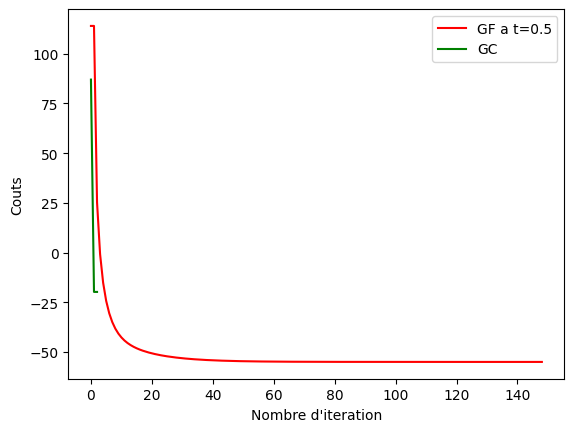

In [ ]:
N = [20,40,80,100,200]
t=0.5

v0 = np.random.randint(10,size = 10)

print('v0 = : ',v0,'\n')
print('algo GF : \n')
print('Cas de J3 : \n')
print('t = 0.5 : \n')

for n in N:
  u,k,L_GF = GF(v0,J3,gradient_J3,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GF1 = L_GF


plt.plot(L_GF1,color = 'red',label = 'GF a t=0.5')
plt.plot(L_GC1 ,color = 'green',label = 'GC')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')



v0 = :  [1 8 0 4 3 6 1 1 0 1] 

algo GF : 

Cas de J4 : 

t = 1 : 

N =  20 :  vecteur final :  [ 2.53109590e+14 -4.94086957e+14 -1.11490016e+13  7.17862818e+14
 -4.28519797e+14 -4.91166491e+14  6.24796058e+14  7.15404329e+13
 -4.18793765e+14  1.60011449e+14] , nombre d'iteration :  21 

N =  40 :  vecteur final :  [ 2.38192287e+28 -4.32217402e+28 -4.38027651e+27  6.68318875e+28
 -3.85520873e+28 -4.74268616e+28  6.19811847e+28  4.63161399e+27
 -4.27210736e+28  1.89685259e+28] , nombre d'iteration :  41 

N =  80 :  vecteur final :  [ 2.15991371e+56 -3.90624598e+56 -4.13549702e+55  6.06605574e+56
 -3.49259656e+56 -4.31967930e+56  5.65233065e+56  4.13593995e+55
 -3.90602344e+56  1.74618861e+56] , nombre d'iteration :  81 

N =  100 :  vecteur final :  [ 2.05980737e+70 -3.72518409e+70 -3.94428292e+69  5.78498435e+70
 -3.33074961e+70 -4.11960399e+70  5.39054491e+70  3.94430152e+69
 -3.72516925e+70  1.66536793e+70] , nombre d'iteration :  101 

N =  200 :  vecteur final :  [ 1.62489843e+140

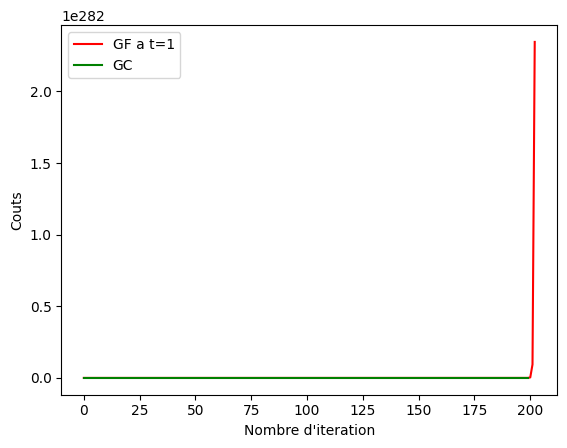

In [ ]:
N = [20,40,80,100,200]
t=1

v0 = np.random.randint(10,size = 10)

print('v0 = : ',v0,'\n')
print('algo GF : \n')
print('Cas de J4 : \n')
print('t = 1 : \n')

for n in N:
  u,k,L_GF = GF(v0,J4,gradient_J4,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GF1 = L_GF


plt.plot(L_GF1,color = 'red',label = 'GF a t=1')
plt.plot(L_GC11 ,color = 'green',label = 'GC')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

v0 = :  [8 0 3 5 4 6 7 1 0 3] 

algo GF : 

Cas de J4 : 

t = 0.5 : 

N =  20 :  vecteur final :  [-1127707.82626915  3178491.24808788  -977804.28041077 -4232018.29548311
  4188606.70278406  2050570.90519619 -5224303.16181898  1134758.55566549
  3085554.19854164 -2119985.69260502] , nombre d'iteration :  21 

N =  40 :  vecteur final :  [-1.10149337e+12  3.29990611e+12 -1.09825192e+12 -4.39924079e+12
  4.39826979e+12  2.19779445e+12 -5.49675261e+12  1.10131906e+12
  3.29660423e+12 -2.19900518e+12] , nombre d'iteration :  41 

N =  80 :  vecteur final :  [-1.20892745e+24  3.62677944e+24 -1.20892558e+24 -4.83570461e+24
  4.83570400e+24  2.41785053e+24 -6.04462791e+24  1.20892675e+24
  3.62677527e+24 -2.41785075e+24] , nombre d'iteration :  81 

N =  100 :  vecteur final :  [-1.26765065e+30  3.80295187e+30 -1.26765060e+30 -5.07060245e+30
  5.07060243e+30  2.53530116e+30 -6.33825296e+30  1.26765062e+30
  3.80295172e+30 -2.53530116e+30] , nombre d'iteration :  101 

N =  200 :  vecteur fina

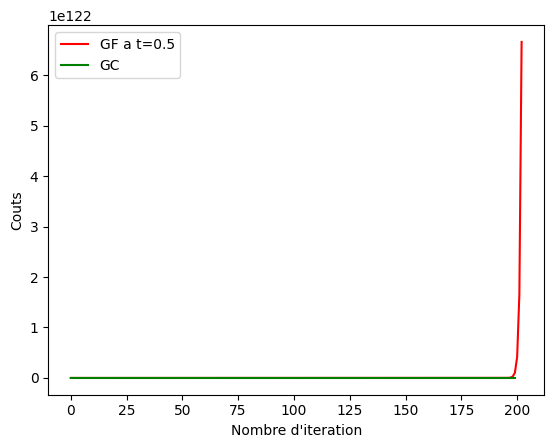

In [ ]:
N = [20,40,80,100,200]
t=0.5

v0 = np.random.randint(10,size = 10)

print('v0 = : ',v0,'\n')
print('algo GF : \n')
print('Cas de J4 : \n')
print('t = 0.5 : \n')

for n in N:
  u,k,L_GF = GF(v0,J4,gradient_J4,1e-5,n,t)
  print('N = ',n,': ','vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
L_GF1 = L_GF


plt.plot(L_GF1,color = 'red',label = 'GF a t=0.5')
plt.plot(L_GC11 ,color = 'green',label = 'GC')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

#ETAPE 3

Dans cette etape , nous allons effectuer une  étude du comportement de NLGC de la fonction $J_{\epsilon}(v) suivante :

$J_{\epsilon}(v) = \sum_{i=1}^N (v_{i})^2  + \frac{1}{\epsilon} \sum_{i=1}^{N-1} (v_{i} + v_{i+1} - \frac{N}{2})^2$

.


In [ ]:
#Algorithme NLGC

def NLGC(u0, A, b, epsilon, nb_iteration):
    k = 1
    costs = []
    r = b - A @ u0
    d = r
    u = np.copy(u0)
    while (k <= nb_iteration) and (np.linalg.norm(r) > epsilon):
        costs.append(0.5 * u.T @ A @ u - b.T @ u)
        alpha = r.T @ r / (d.T @ A @ d)
        u = u + alpha * d
        r_new = r - alpha * A @ d
        beta = np.dot(r_new, r) / np.dot(r, r)
        d = r_new + beta * d
        r = r_new
        k += 1
    return u, k, costs



In [ ]:
def J_epsilon(v, epsilon):
    J = 0
    N = len(v)
    for i in range(N):
        J += v[i]**2
        if i < N-1:
            J += (1 / epsilon) * (v[i] + v[i+1] - N/2)**2
    return J


In [ ]:
def gradient_J_epsilon(v, epsilon):
    N = len(v)
    grad = np.zeros_like(v)
    for i in range(N):
        grad[i] = 2 * v[i]
        if i > 0:
            grad[i] += (2 / epsilon) * (v[i] + v[i-1] - N/2)
        if i < N-1:
            grad[i] += (2 / epsilon) * (v[i] + v[i+1] - N/2)
    return grad

In [ ]:
def A(N,epsilon):
    Me = np.zeros((N, N))
    np.fill_diagonal(Me, 2)
    np.fill_diagonal(Me[1:], 1)
    np.fill_diagonal(Me[:, 1:], 1)
    Me[0,0] = 1
    Me[N-1,N-1] = 1
    A = 2 * np.eye(N) + 2 * Me / epsilon 
    return A





def b(N,epsilon):
    mat = 2 * np.ones(N)
    mat[0] = 1
    mat[N-1] = 1
    b = mat * N / epsilon 
    return b

In [ ]:
N = [10,20,40,80,100,200]

epsilon_values = [10 ** (-p) for p in range(4)]
Kmax = 50000

for n in N:
    u0 = np.random.rand(n)
    for epsilon in epsilon_values:
        u_star, k, costs = NLGC(u0, A(n, epsilon), b(n, epsilon), 10e-6, Kmax)
        c = np.full(n, n / 4)

        print(f"N = {n}, epsilon = {epsilon}")
        print(f"u_0: {u0}")
        print(f"u_star: {u_star}")
        print(f"Cost de u_star: {J_epsilon(u_star, epsilon)}")
        print(f"Gradient de u_star: {gradient_J_epsilon(u_star, epsilon)}")
        print(f"Cost de c: {J_epsilon(c, epsilon)}")
        print(f"Gradient de c: {gradient_J_epsilon(c, epsilon)}")
        print()


N = 10, epsilon = 1
u_0: [0.97523683 0.91178161 0.94922915 0.0024178  0.08417212 0.93358263
 0.21475472 0.28000692 0.9563209  0.50364201]
u_star: [1.38211493 2.2357714  1.91057022 2.0325196  1.99187089 1.99186942
 2.03252108 1.91056873 2.23577289 1.38211343]
Cost de u_star: 47.7642276422834
Gradient de u_star: [ 2.51380373e-06 -1.31764587e-06  3.29634082e-06 -1.77409153e-07
  3.38366675e-06  4.46204685e-07  2.76578126e-06  3.12109568e-07
  1.67585404e-06 -5.05060829e-07]
Cost de c: 62.5
Gradient de c: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]

N = 10, epsilon = 0.1
u_0: [0.97523683 0.91178161 0.94922915 0.0024178  0.08417212 0.93358263
 0.21475472 0.28000692 0.9563209  0.50364201]
u_star: [2.1416768  2.64415566 2.30559627 2.51409239 2.41480973 2.41480745
 2.51409467 2.30559399 2.64415794 2.14167452]
Cost de u_star: 60.101647931609904
Gradient de u_star: [ 2.75922293e-06 -8.81219548e-07  4.45344249e-06  4.63234444e-07
  5.31674317e-06  7.60602928e-07  5.01937443e-06 -1.02697862e-07
  3.67492055e-

#Interpretation 


Il est constaté que le coût de U est toujours plus élevé que celui de c, quelles que soient les valeurs de N et d'$\epsilon$. Par conséquent, il semble que la solution optimale calculée U ne soit pas aussi efficace que le vecteur c en termes de coût.

À mesure que $\epsilon$ diminue, le coût de $u^{}$ est plus important  tandis que celui de c qui demeure constant, ce qui laisse entendre que $u^{}$ est plus sensible à la fluctuations  de $\epsilon$ que c. Le gradient de c reste stable malgré les variations de $\epsilon$, ce qui suggère que le vecteur c est moins susceptible aux changements de $\epsilon$ que $u^{*}$.

# TP3
## Étape 1

Nous reprenons un algorithme de minimisation par gradient à pas variable 
avec :

$ u^{(0)} $ donné 

$ u^{(k+1)} = u^{(k)} − ρ_{k}∇J(u^{(k)}) $


In [ ]:
def S(uk,uk_1):
    return uk-uk_1

def Y(uk,uk_1,gradient):
    return gradient(uk)-gradient(uk_1)

In [ ]:
def BB1(u0,fonction,gradient,epsilon,nb_iteration,t0):
    k=1
    L = [fonction(u0)]
    new_t = t0
    u1=np.copy(u0-new_t*gradient(u0))
    L.append(fonction(u1))
    while (k<nb_iteration) and (abs(fonction(u1)-fonction(u0))>epsilon):
        new_t = (np.dot(S(u1,u0),S(u1,u0)))/(np.dot(Y(u1,u0,gradient),Y(u1,u0,gradient)))
        u0=u1
        u1=np.copy(u0-new_t*gradient(u0))
        k+=1
        L.append(fonction(u1))
    return u1,k,L

def BB2(u0,fonction,gradient,epsilon,nb_iteration,t0):
    k=1
    L = [fonction(u0)]
    new_t = t0
    u1=np.copy(u0-new_t*gradient(u0))
    L.append(fonction(u1))
    while (k<nb_iteration) and (abs(fonction(u1)-fonction(u0))>epsilon):
        new_t = (np.dot(S(u1,u0),Y(u1,u0,gradient)))/(np.dot(Y(u1,u0,gradient),Y(u1,u0,gradient)))
        u0=u1
        u1=np.copy(u0-new_t*gradient(u0))
        k+=1
        L.append(fonction(u1))
    return u1,k,L
  
def NLCG2 (u0,fonction,gradient,epsilon,nb_iteration,t0):
  liste=[fonction(u0)]
  k=0
  d0=gradient(u0)
  t=t0
  u1=np.copy(u0-t0*d0)
  liste.append(fonction(u1))
  while (k<nb_iteration) and (abs(fonction(u1)-fonction(u0))>epsilon):
    k+=1
    u0=u1
    bheta=np.dot(gradient(u1),gradient(u1)-gradient(u0))/(np.dot(gradient(u0),d0))
    u1=np.copy(u0-t0*d0)
    d0=gradient(u1)+bheta*d0
    liste.append(fonction(u1))
  return u1,k,liste

## Étape 2

Nous allons effectuer les tests de validation pour les fonctions quadratiques suivantes (N = 10) :

$ \quad\quad\quad  J_1(v) = \sum_{i=1}^{N} (v_i - 1)^2 \quad\quad\quad J_2(v) = \sum_{i=1}^{N} (v_i - i)^2
$

In [ ]:
v0 = np.random.randint(10,size = 10)
N = 10
t=0.1
print("B1 : ")
print("J1 : \n")
u,k,L = BB1(v0,J1,gradient_J1,1e-5,N,0.1)
print('N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

print("J2 : \n")
u,k,L = BB1(v0,J2,gradient_J2,1e-5,N,0.1)
print('N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')


print("B2 : ")
print("J1 : \n")
u,k,L = BB2(v0,J1,gradient_J1,1e-5,N,0.1)
print('N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

print("J2 : \n")
u,k,L = BB2(v0,J2,gradient_J2,1e-5,N,0.1)
print('N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')

B1 : 
J1 : 

N =  10 ,vecteur final :  [1.003125  0.9984375 1.0109375 1.009375  1.0078125 1.0109375 1.0109375
 1.0046875 1.009375  1.00625  ] , nombre d'iteration :  10 

J2 : 

N =  10 ,vecteur final :  [1.003125  1.996875  3.0078125 4.0046875 5.0015625 6.003125  7.0015625
 7.99375   8.996875  9.9921875] , nombre d'iteration :  10 

B2 : 
J1 : 

N =  10 ,vecteur final :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] , nombre d'iteration :  3 

J2 : 

N =  10 ,vecteur final :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] , nombre d'iteration :  3 



## Étape 3

On considère maintenant les fonctions suivantes (en dimension N) : 

$ J_5(v) = \frac{1}{2}(Av, v) - (f, v) + \sum_{i=1}^{N} v_i^2 \\ J_6(v) = \frac{1}{2}(Av, v) - (f, v) + \sum_{i=1}^{N} v_i^4
$


avec $ f = (1, \ldots, 1) $ et la matrice $ A = \mathrm{tridiag}[-1, 2, -1] $ et la fonction de Rosenbrock

$ J_R(v) = \sum_{i=1}^{N-1} (v_{i+1} - \frac{v_i^2}{2})^2 + \sum_{i=1}^{N} (v_i - 1)^2 \\
$





In [ ]:
n = 10
v0 = np.random.randint(10,size = n)
f = np.ones(n)
A = tridiag(-1,2,-1,n)

def J5(v):
    return 1/2*np.dot(np.dot(A,v),v) - np.dot(f,v) + np.dot(v,v)

def J6(v):
    n = v.shape[0]
    S = 1/2*np.dot(np.dot(A,v),v) - np.dot(f,v)
    for i in range(n):
        S+= v[i]**4
    return S

In [ ]:
def gradient_J5(v):
    grad = np.dot((A+A.T)/2,v)-f
    for i in range(v.shape[0]):
        grad[i] += 2 * v[i]
    return grad

def gradient_J6(v):
    grad = np.dot((A+A.T)/2,v)-f
    for i in range(v.shape[0]):
        grad[i] += 4 * v[i]**3
    return grad

In [ ]:
N = [10,20,40,80]


print("J5 : \n")
for n in N:
    u,k,L = BB1(v0,J5,gradient_J5,1e-5,n,0.1)
    print('N = ',n, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_J5 = [L]

print("J6 : \n")
for n in N:
    u,k,L = BB1(v0,J6,gradient_J6,1e-5,n,0.1)
    print('N = ',n, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_J6 = [L]

print("JR : \n")
for n in N:
    u,k,L = BB1(v0,JR,gradient_JR,1e-5,n,0.1)
    print('N = ',n, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_JR = [L]



J5 : 

N =  10 ,vecteur final :  [0.46460064 0.63872509 0.70640645 0.72576727 0.73096993 0.73933018
 0.74704094 0.73248277 0.66281989 0.47976507] , nombre d'iteration :  10 

N =  20 ,vecteur final :  [0.36614276 0.46432462 0.49068414 0.49775434 0.49954144 0.49954541
 0.49776499 0.49069809 0.46433743 0.36615037] , nombre d'iteration :  20 

N =  40 ,vecteur final :  [0.36614276 0.46432462 0.49068414 0.49775434 0.49954144 0.49954541
 0.49776499 0.49069809 0.46433743 0.36615037] , nombre d'iteration :  20 

N =  80 ,vecteur final :  [0.36614276 0.46432462 0.49068414 0.49775434 0.49954144 0.49954541
 0.49776499 0.49069809 0.46433743 0.36615037] , nombre d'iteration :  20 

J6 : 

N =  10 ,vecteur final :  [  -1.2          -7.29999988 -197.89726807    1.69999998  -21.99999624
   -0.50000001  -80.69981475  -80.89981336    1.49999997 -198.29725147] , nombre d'iteration :  10 

N =  20 ,vecteur final :  [  -1.2          -7.29999982 -197.89586386    1.69999997  -21.99999431
   -0.50000001  -80

In [ ]:
N = [10,20,40,80]

print("J5 : \n")
for n in N:
    u,k,L = BB2(v0,J5,gradient_J5,1e-5,n,0.1)
    print('N = ',n, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_J5.append(L)

print("J6 : \n")
for n in N:
    u,k,L = BB2(v0,J6,gradient_J6,1e-5,n,0.1)
    print('N = ',n, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
print(L)
LG_J6.append(L)

print("JR : \n")
for n in N:
    u,k,L = BB2(v0,JR,gradient_JR,1e-5,n,0.1)
    print('N = ',n, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_JR.append(L)

J5 : 

N =  10 ,vecteur final :  [0.3660239  0.46407852 0.4903527  0.49742119 0.49911868 0.49917971
 0.49737436 0.4903741  0.46409396 0.36600513] , nombre d'iteration :  10 

N =  20 ,vecteur final :  [0.3660239  0.46407852 0.4903527  0.49742119 0.49911868 0.49917971
 0.49737436 0.4903741  0.46409396 0.36600513] , nombre d'iteration :  10 

N =  40 ,vecteur final :  [0.3660239  0.46407852 0.4903527  0.49742119 0.49911868 0.49917971
 0.49737436 0.4903741  0.46409396 0.36600513] , nombre d'iteration :  10 

N =  80 ,vecteur final :  [0.3660239  0.46407852 0.4903527  0.49742119 0.49911868 0.49917971
 0.49737436 0.4903741  0.46409396 0.36600513] , nombre d'iteration :  10 

J6 : 

N =  10 ,vecteur final :  [-1.19489222 -5.64022012  6.9887802   1.6643622  -7.44710097 -0.5368122
 -7.53199577 -7.53056383  1.46921622  7.09434382] , nombre d'iteration :  10 

N =  20 ,vecteur final :  [ 0.05975661  0.19032289  0.45812943  0.45877472  0.17677372 -0.04189206
 -0.04746525  0.1599906   0.46646615  

On remarque que BB1 converge plus lentement que BB2 par exemple pour J5, BB2 a besoin de 10 itérations tandisque BB1 en a besoin de 19.

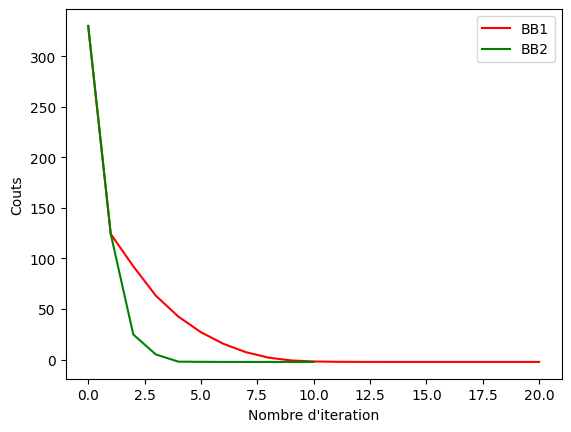

In [ ]:
plt.plot(LG_J5[0],color = 'red',label = 'BB1')
plt.plot(LG_J5[1],color = 'green',label = 'BB2')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

plt.show()

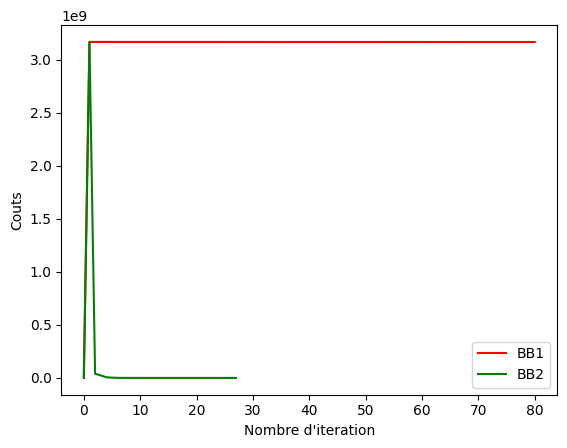

In [ ]:
plt.plot(LG_J6[0],color = 'red',label = 'BB1')
plt.plot(LG_J6[1],color = 'green',label = 'BB2')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

plt.show()

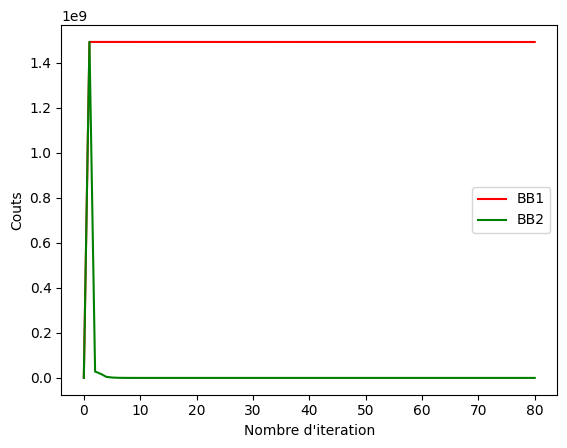

In [ ]:
plt.plot(LG_JR[0],color = 'red',label = 'BB1')
plt.plot(LG_JR[1],color = 'green',label = 'BB2')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

plt.show()

## Étape 4

In [ ]:
N = 40
n = 2
v0 = np.random.randint(10,size = n)
t = 0.001

LG_JR = []
LG_JH = []

u,k,L = BB1(v0,JR,gradient_JR,1e-5,N,t)
print('BB1 : ','N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_JR.append(L)

u,k,L = BB1(v0,JH,gradient_JH,1e-5,N,t)
print('BB1 : ','N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_JH.append(L)

u,k,L = NLCG2(v0,JR,gradient_JR,1e-5,N,t)
print('GC : ','N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_JR.append(L)

u,k,L = NLCG2(v0,JH,gradient_JH,1e-5,N,t)
print('GC : ','N = ',N, ',vecteur final : ',u,', nombre d\'iteration : ',k,'\n')
LG_JH.append(L)

BB1 :  N =  40 ,vecteur final :  [4.30321234 2.07107839] , nombre d'iteration :  40 

BB1 :  N =  40 ,vecteur final :  [4.23957016 1.9844305 ] , nombre d'iteration :  40 

GC :  N =  40 ,vecteur final :  [2.05558384 2.45114575] , nombre d'iteration :  40 

GC :  N =  40 ,vecteur final :  [1.64989889 1.64747804] , nombre d'iteration :  40 



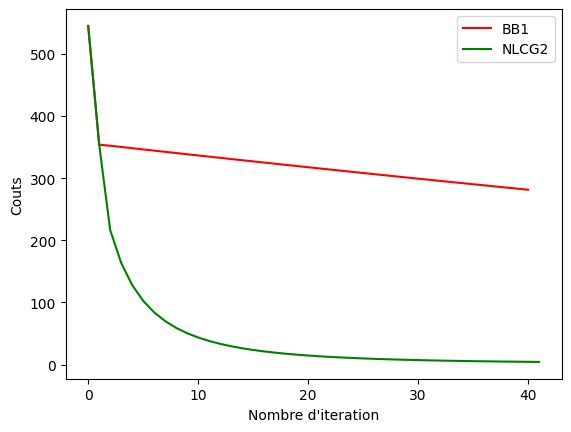

In [ ]:
plt.plot(LG_JR[0],color = 'red',label = 'BB1')
plt.plot(LG_JR[1],color = 'green',label = 'NLCG2')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

plt.show()

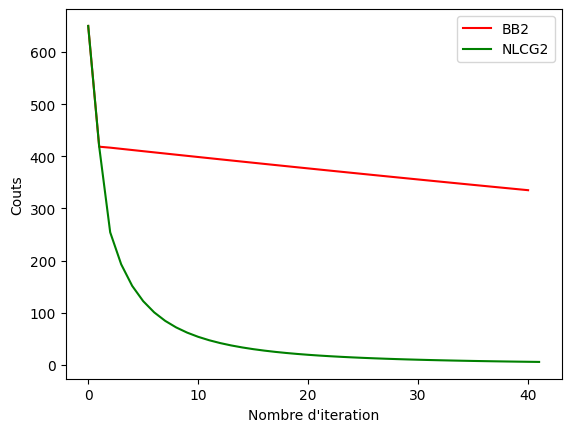

In [ ]:
plt.plot(LG_JH[0],color = 'red',label = 'BB2')
plt.plot(LG_JH[1],color = 'green',label = 'NLCG2')
plt.xlabel('Nombre d\'iteration')
plt.ylabel('Couts')
plt.legend(loc='best')

plt.show()